# Data Model : Classification Model using Titanic Data

#### Build LightGBM Model to Predict the Survival of a Titanic Passenger

`SKLearn API`

---

### Organization of the Notebook 

Read Titanic Data

Split Data : Train, Validation, Test 

Convert Data to `LGBM Data Structure`

Build Model using `SKLearn API`

Predict 

Performance Measure on Test Data

Plot Mertics 

`SHAP Analysis` for `Model Explainability`

Cross-Validation

Probability Calibration 

---

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from graphviz import Digraph

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [4]:
import lightgbm as lgb

In [5]:
try:
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [6]:
%matplotlib inline

### Read Data

In [7]:
# import seaborn as sns
# train_df = sns.load_dataset('titanic')
# train_df = train_df.drop(['who','alive','alone'], axis=1)

In [8]:
# """CatBoost"""
# from catboost.datasets import titanic
# train_df, test_df = titanic()

In [9]:
# null_value_stats = train_df.isnull().sum(axis=0)
# null_value_stats[null_value_stats != 0]
# train_df.fillna(np.nan, inplace=True)
# test_df.fillna(np.nan, inplace=True)

In [10]:
# X = train_df.drop('Survived', axis=1)
# y = train_df.Survived

In [11]:
"""Import Jupyter Notebook"""

import ipynb
import ipynb.fs.full.example_titanicData_dataProcessing as jnds

In [12]:
train_df, test_df = jnds.train_test_ordinal

X = train_df.drop('Survived', axis=1)
y = train_df.Survived

#### Split Data

In [13]:
feature_names = X.columns.tolist()
categorical_features_indices = np.where(X.dtypes != np.float64)[0]
categorical_features_names = X.columns[ categorical_features_indices ].tolist()
print(f"Total Features : {feature_names}" )
print(f"Categorical Features : {categorical_features_names}" )

Total Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NameLength', 'FamilySize', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Boat', 'HomeDest', 'LastName', 'Title']
Categorical Features : ['Pclass', 'SibSp', 'Parch', 'NameLength', 'FamilySize', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Boat', 'HomeDest', 'LastName', 'Title']


In [14]:
theSeed = 209
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, random_state=theSeed)
print(f'train data: {X_train.shape}')
print(f'valid data: {X_valid.shape}')

train data: (785, 16)
valid data: (197, 16)


In [15]:
#X_test = test_df
X_test = test_df.drop('Survived', axis=1)
y_test = test_df.Survived
print(f'test data : {X_test.shape}')

test data : (327, 16)


#### Setting Weight to the Data

In [16]:
# w = np.random.rand(X_train.shape[0], )
# train_data = lgb.Dataset(data=X_train, label=y_train, weight=w)
# train_data.set_weight(w)

#### LGBM Data Structure

In [17]:
train_data = lgb.Dataset(
    data=X_train, 
    label=y_train, 
    feature_name=feature_names, 
    categorical_feature=categorical_features_names,
    weight=None, 
    free_raw_data=False)

valid_data = lgb.Dataset(
    data=X_valid, 
    label=y_valid, 
    reference=train_data, 
    weight=None, 
    free_raw_data=False)

### Train Model

#### Model With Default Parameters

In [18]:
model = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    n_estimators=100, 
    num_leaves=31, 
    max_depth=-1, 
    learning_rate=0.1, 
    subsample_for_bin=200000, 
    objective='binary', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,  
    importance_type='split', #'gain'
)

In [19]:
fit = model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_names=None, 
    eval_sample_weight=None, 
    eval_class_weight=None, 
    eval_init_score=None, 
    eval_metric='auc', 
    early_stopping_rounds=None, 
    #verbose=False, 
    init_model=None,
    #feature_name='auto', 
    #categorical_feature='auto', 
    callbacks=None
)

[1]	valid_0's auc: 0.986614	valid_0's binary_logloss: 0.56776
[2]	valid_0's auc: 0.993307	valid_0's binary_logloss: 0.499999
[3]	valid_0's auc: 0.993195	valid_0's binary_logloss: 0.443692
[4]	valid_0's auc: 0.995107	valid_0's binary_logloss: 0.396562
[5]	valid_0's auc: 0.993082	valid_0's binary_logloss: 0.356604
[6]	valid_0's auc: 0.993082	valid_0's binary_logloss: 0.322431
[7]	valid_0's auc: 0.995051	valid_0's binary_logloss: 0.293085
[8]	valid_0's auc: 0.995332	valid_0's binary_logloss: 0.267735
[9]	valid_0's auc: 0.995219	valid_0's binary_logloss: 0.245859
[10]	valid_0's auc: 0.994882	valid_0's binary_logloss: 0.226866
[11]	valid_0's auc: 0.995107	valid_0's binary_logloss: 0.210267
[12]	valid_0's auc: 0.995107	valid_0's binary_logloss: 0.195349
[13]	valid_0's auc: 0.995107	valid_0's binary_logloss: 0.182285
[14]	valid_0's auc: 0.995219	valid_0's binary_logloss: 0.170819
[15]	valid_0's auc: 0.994882	valid_0's binary_logloss: 0.161275
[16]	valid_0's auc: 0.994769	valid_0's binary_logl

#### Model Evaluation

In [20]:
auc = list(model.evals_result_.values())[0]['auc']
auc = np.array(auc)
print(f"Mean AUC : { round(auc.mean(),4) }")
loss = list(model.evals_result_.values())[0]['binary_logloss']
loss = np.array(loss)
print(f"Mean Loss : { round(loss.mean(),4) }")

Mean AUC : 0.9932
Mean Loss : 0.1271


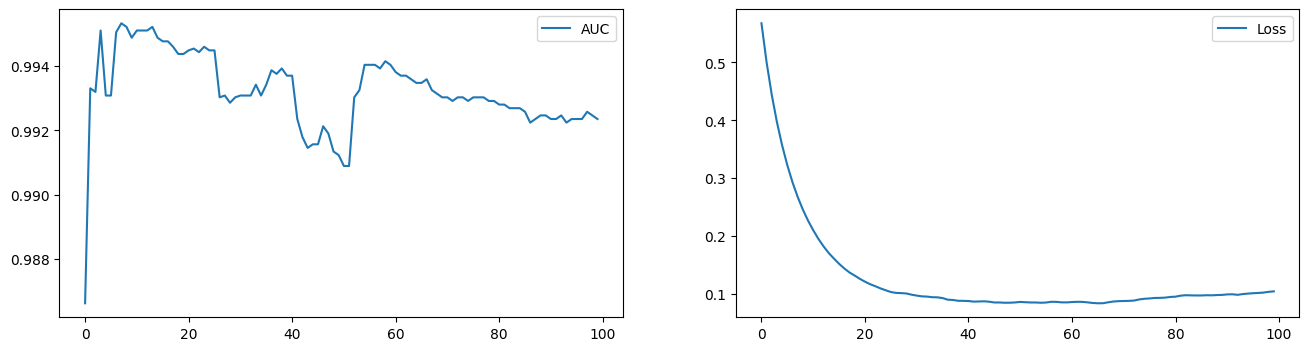

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
ax[0].plot(auc, label='AUC')
ax[1].plot(loss,label='Loss')

ax[0].legend()
ax[1].legend()
plt.show()

### Predict

In [22]:
y_pred = model.predict(
    X_test, 
    start_iteration=0, 
    num_iteration=model.best_iteration_, 
    raw_score=False, 
    pred_leaf=False, 
    pred_contrib=False)

In [23]:
y_score = model.predict_proba(
    X_test, 
    start_iteration=0, 
    num_iteration=model.best_iteration_, 
    raw_score=False, 
    pred_leaf=False, 
    pred_contrib=False)

### Performance Metrics on Test Data

In [24]:
from sklearn import metrics

In [25]:
"""Accuracy Score"""
accuracy = metrics.accuracy_score(y_test, y_pred, sample_weight=None, normalize=True)
print( round(accuracy, 4))

0.9786


In [26]:
"""Balanced Accuracy Score"""
balanced_accuracy = metrics.balanced_accuracy_score(y_test, y_pred, sample_weight=None, adjusted=False)
print( round(balanced_accuracy, 4))

0.9737


In [27]:
"""ROC Curve"""
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1])

In [28]:
"""AUC"""
auc = metrics.auc(fpr, tpr)
print( round(auc, 4))

0.9941


In [29]:
"""Confusion Matrix"""
metrics.confusion_matrix(y_test, y_pred)

array([[200,   1],
       [  6, 120]])

In [30]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:200, FP:1, FN:6, TP:120


In [31]:
"""F1 Score"""
f1 = metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
print( round(f1, 4))

0.9717


In [32]:
"""Log Loss"""
metrics.log_loss(y_test, y_score[:, 1], normalize=True, sample_weight=None, labels=[0,1])

0.10900084273873227

In [33]:
"""Precision, Recall, Fscore, Support"""
metrics.precision_recall_fscore_support(y_test, y_pred, labels=[0,1], pos_label=1, 
                                        average=None, sample_weight=None)

(array([0.97087379, 0.99173554]),
 array([0.99502488, 0.95238095]),
 array([0.98280098, 0.97165992]),
 array([201, 126]))

In [34]:
precision = metrics.precision_score(y_test, y_pred, labels=[0,1], pos_label=1, 
                                    average='binary', sample_weight=None)
print( round(precision, 4))

0.9917


In [35]:
recall = metrics.recall_score(y_test, y_pred, labels=[0,1], pos_label=1, 
                              average='binary', sample_weight=None)
print( round(recall, 4))

0.9524


### Performance Metric Plots

/var/folders/61/4zwlch4j08b0l71m9n7ystv80000gn/T/ipykernel_34980/625766352.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,1], fontsize=12)
/var/folders/61/4zwlch4j08b0l71m9n7ystv80000gn/T/ipykernel_34980/625766352.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,1], fontsize=12)


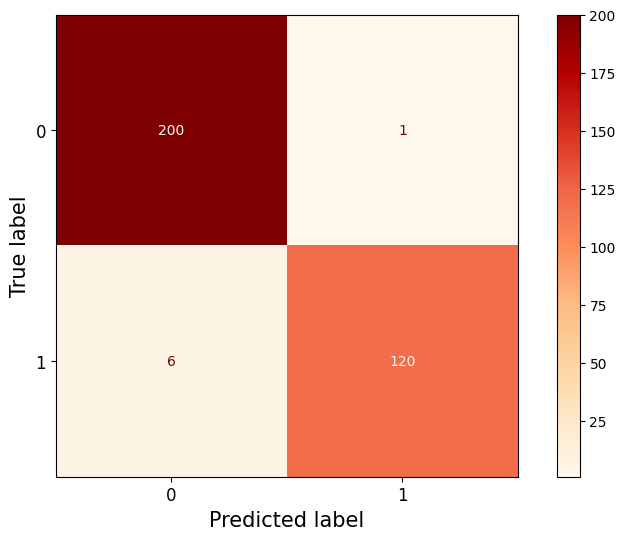

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel("", fontsize=15)
ax.set_ylabel("", fontsize=15)
ax.set_xticklabels([0,1], fontsize=12)
ax.set_yticklabels([0,1], fontsize=12)

ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    labels=None, 
    sample_weight=None, 
    normalize=None, 
    display_labels=[0,1], 
    cmap='OrRd', 
    #color='w',
    ax=ax
)

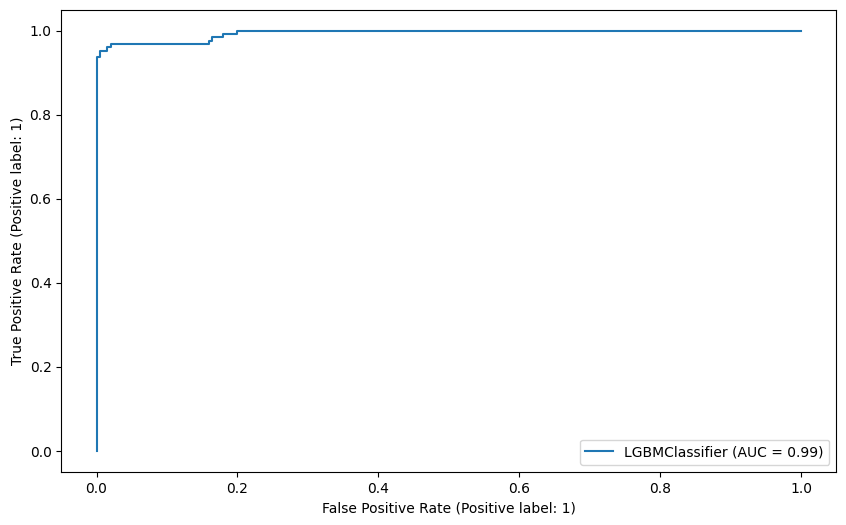

In [37]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10,6))
RocCurveDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

plt.show()

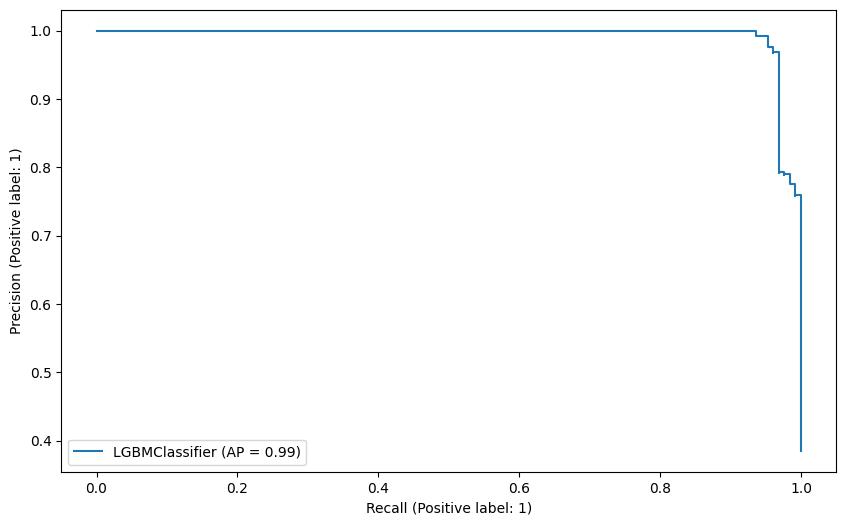

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(10,6))
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, sample_weight=None, ax=ax)

plt.show()

### SHAP Analysis

In [39]:
import shap
shap.initjs()

In [40]:
explainer = shap.Explainer(fit)
shap_values = explainer(X_train)

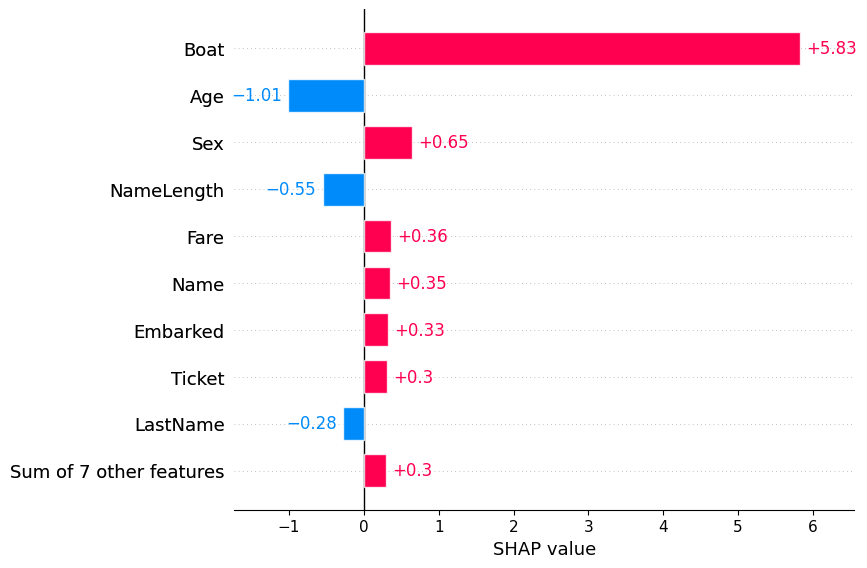

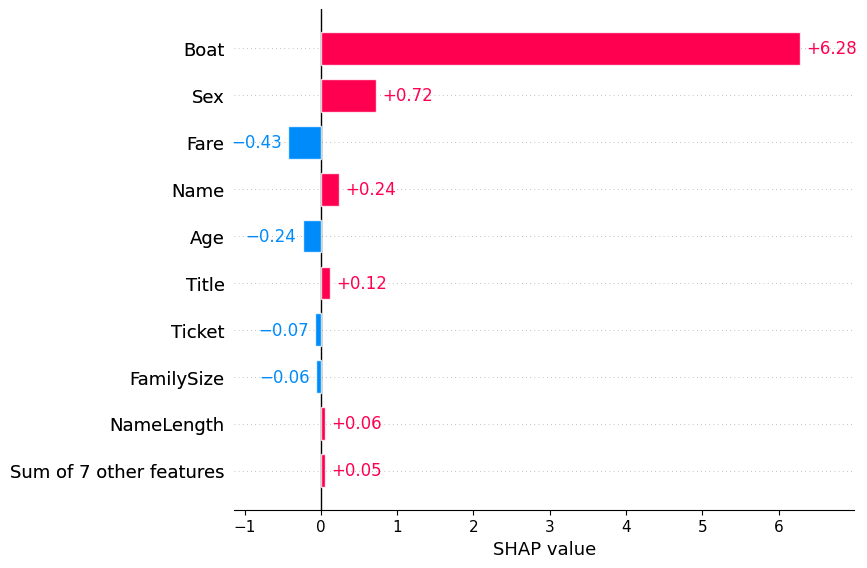

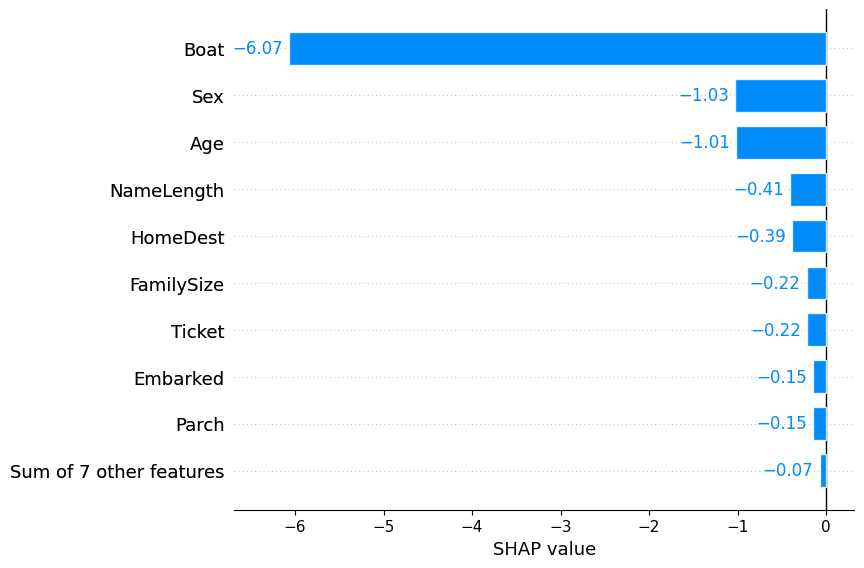

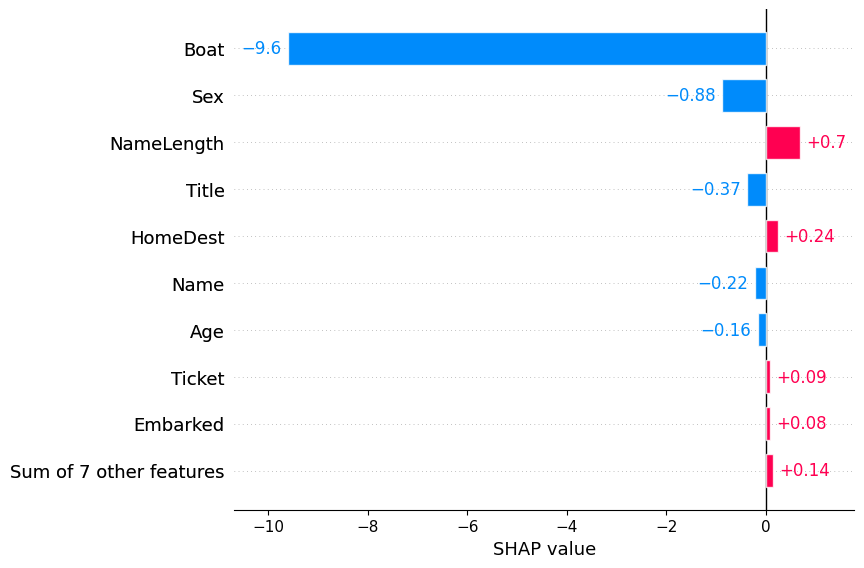

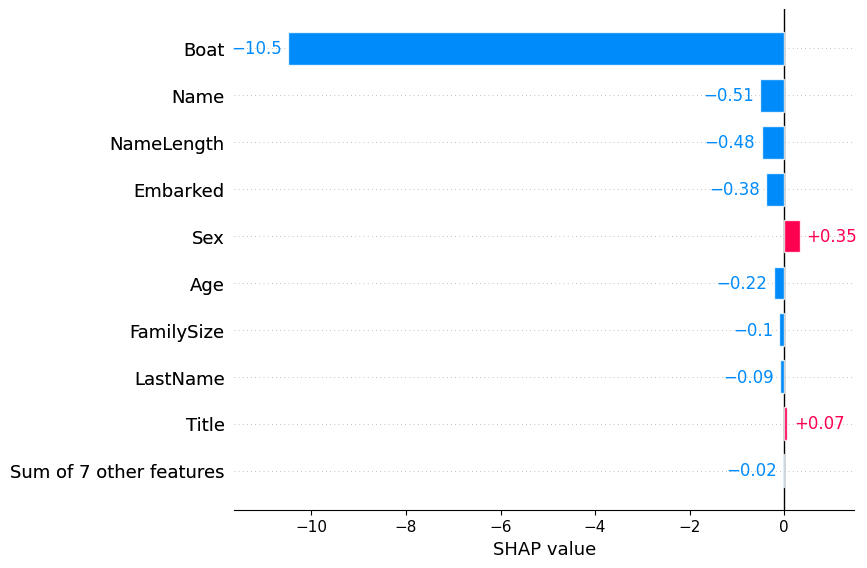

In [41]:
for i in range(5):
    shap.plots.bar(shap_values[:,:,0][i])

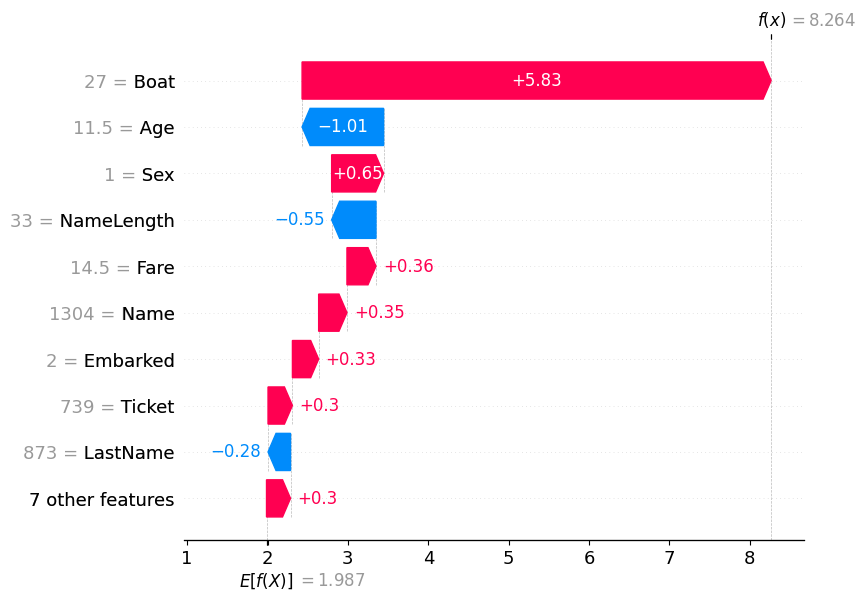

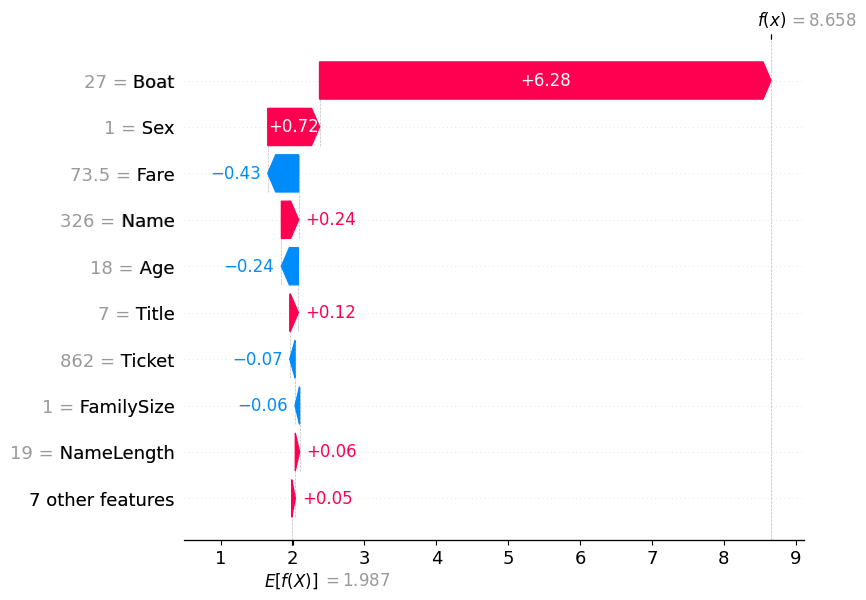

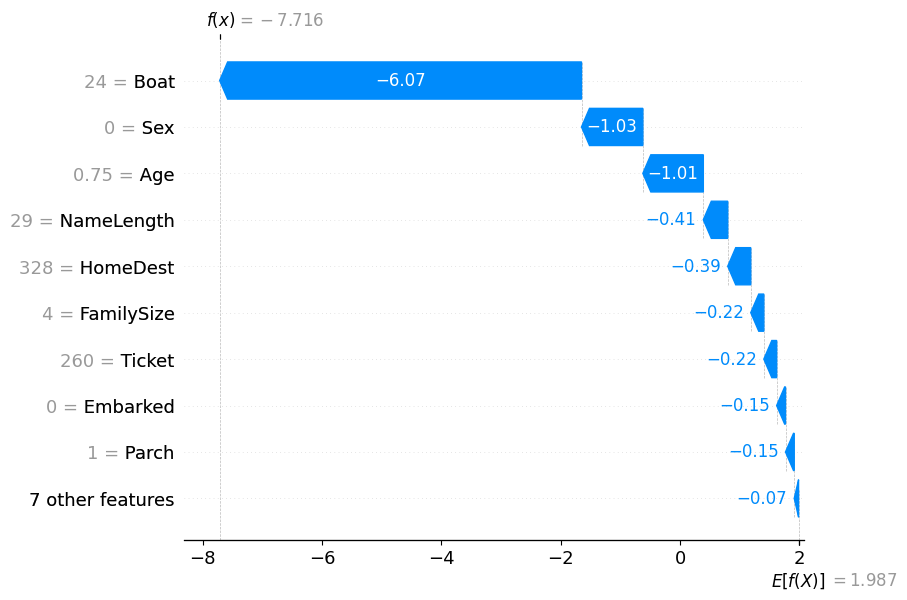

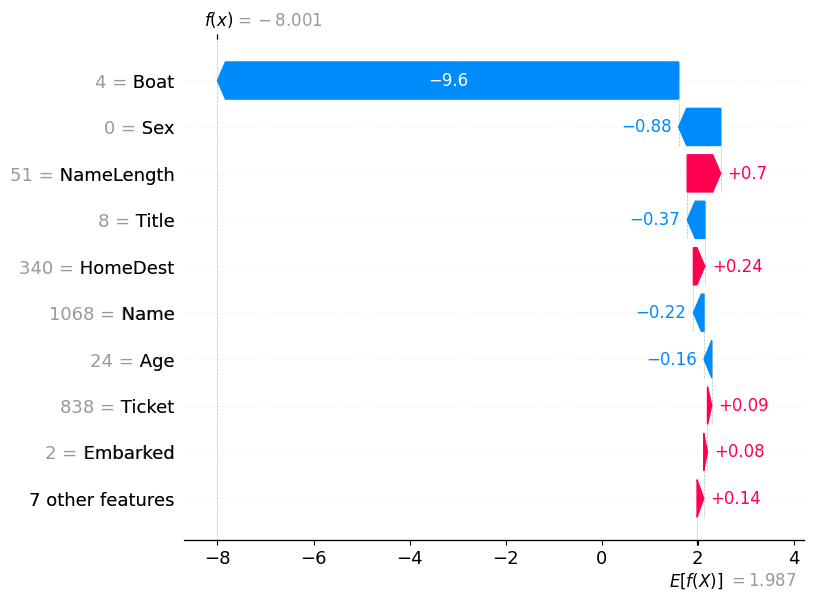

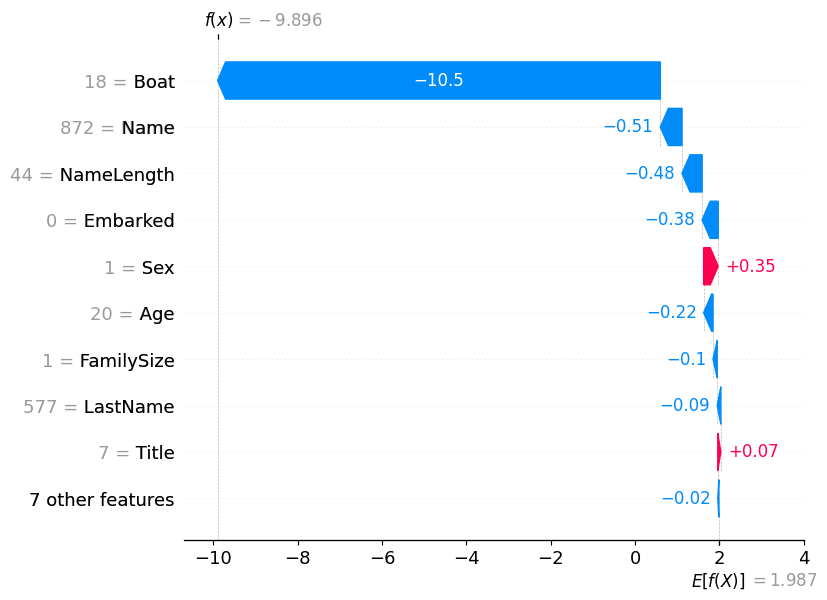

In [42]:
for i in range(5):
    shap.plots.waterfall(shap_values[:,:,0][i])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


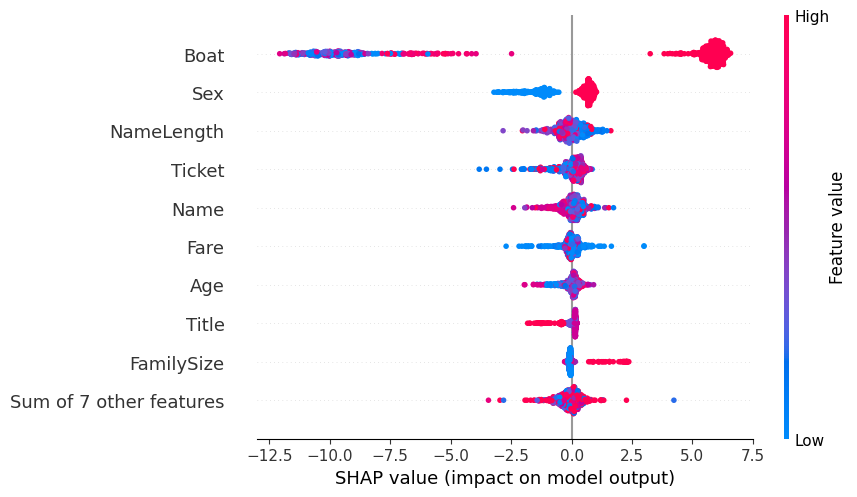

In [43]:
shap.plots.beeswarm(shap_values[:,:,0])

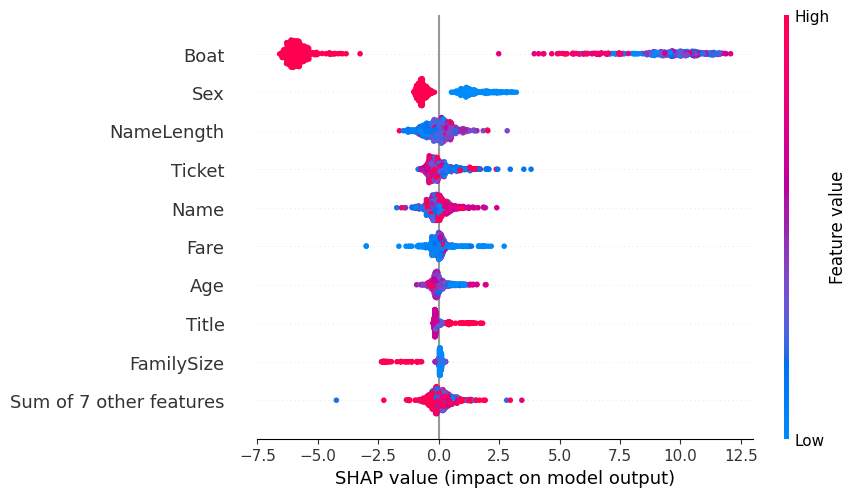

In [44]:
shap.plots.beeswarm(shap_values[:,:,1])

In [45]:
treeExplainer = shap.TreeExplainer(model, 
                               data=None, 
                               feature_perturbation= "tree_path_dependent", 
                               model_output='raw')
shap_values = treeExplainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [46]:
shap.force_plot(treeExplainer.expected_value[1], shap_values[1][:100,:], X_train.iloc[0:100,:])

SHAP Summary Plot

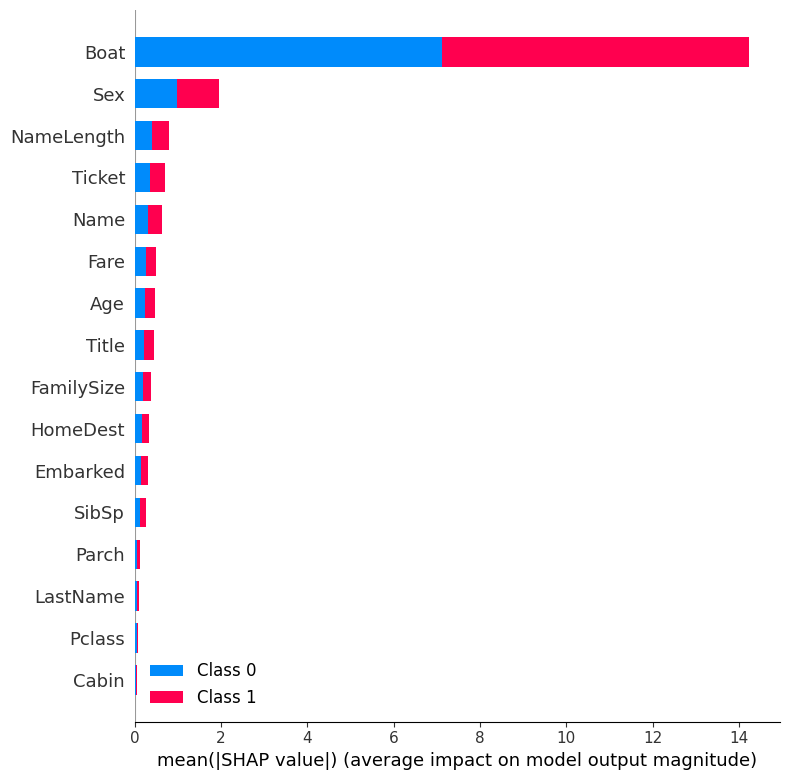

In [47]:
shap.summary_plot(shap_values, X_train)

SHAP Dependence Plot

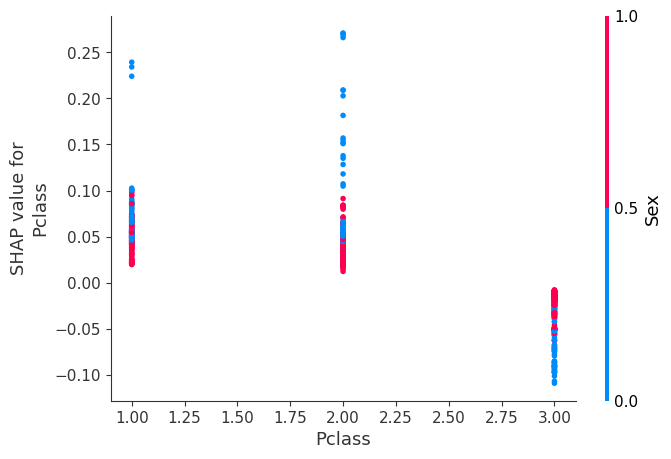

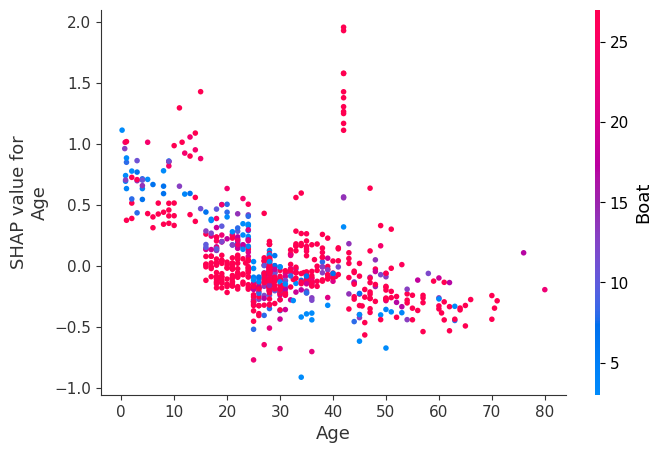

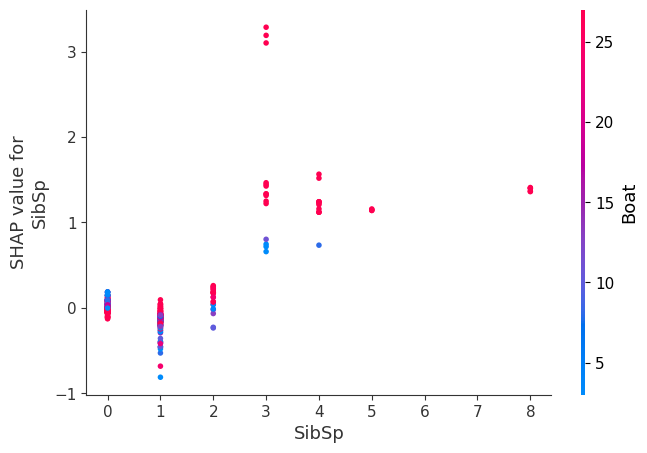

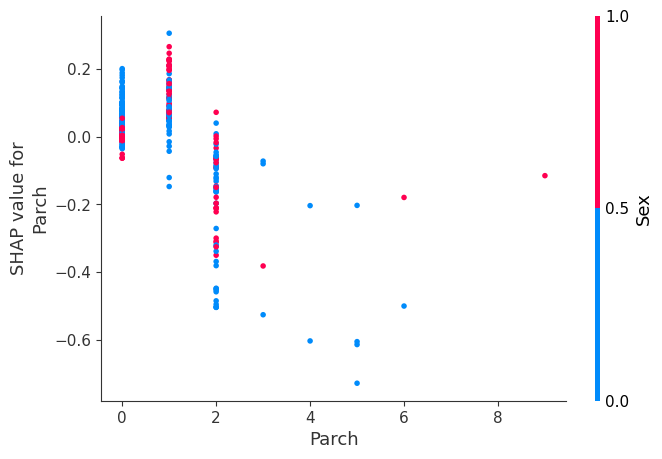

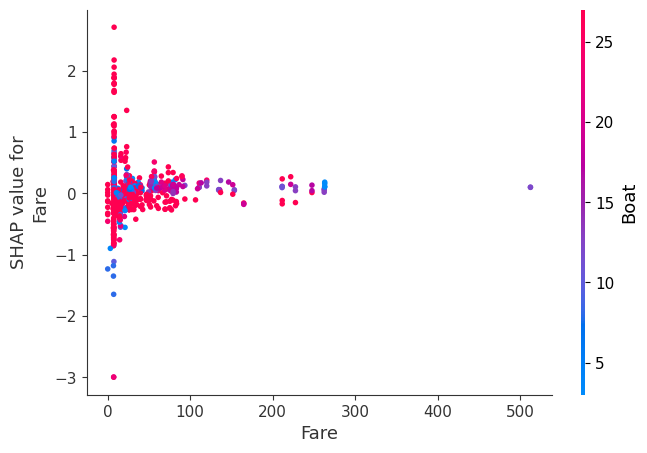

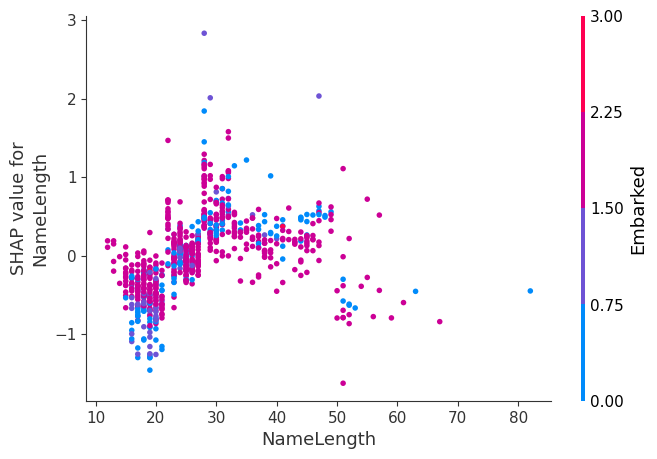

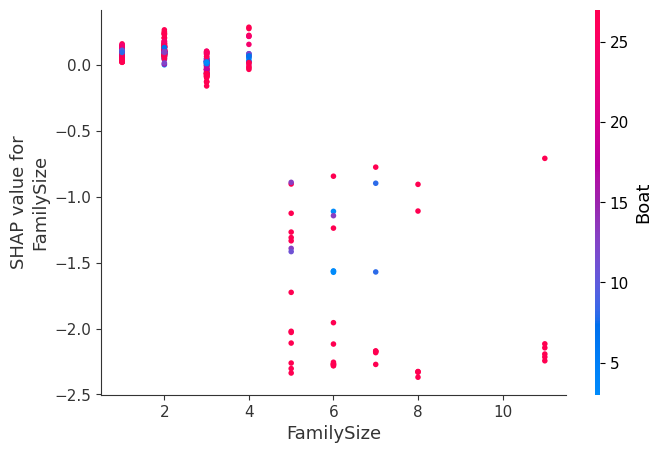

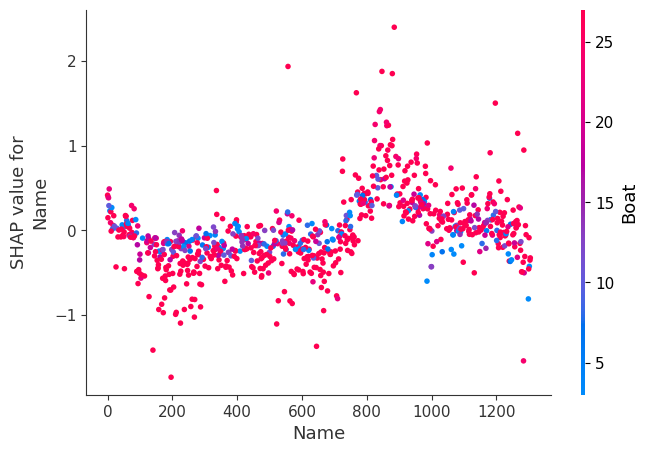

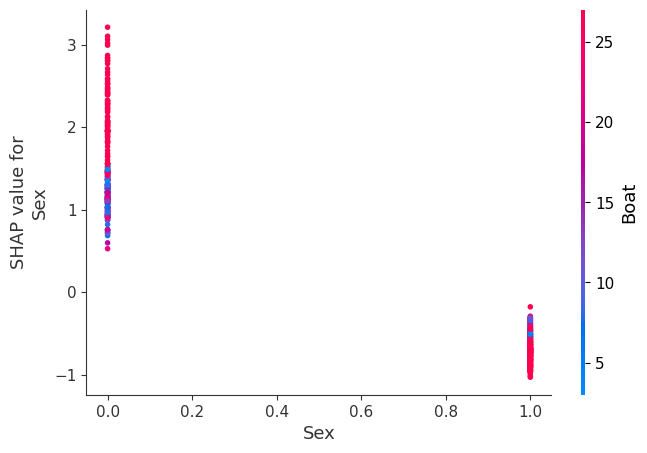

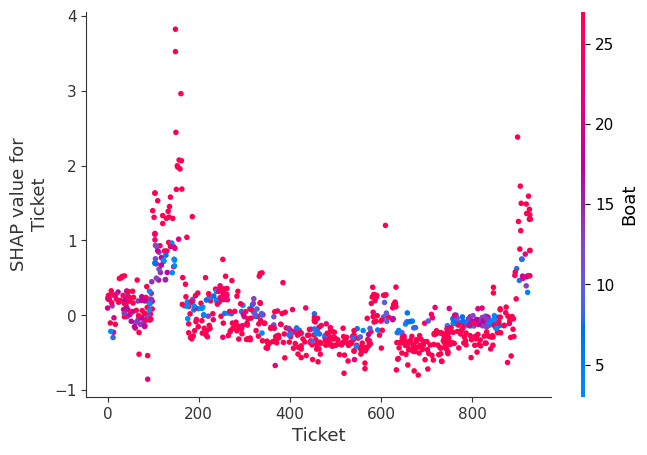

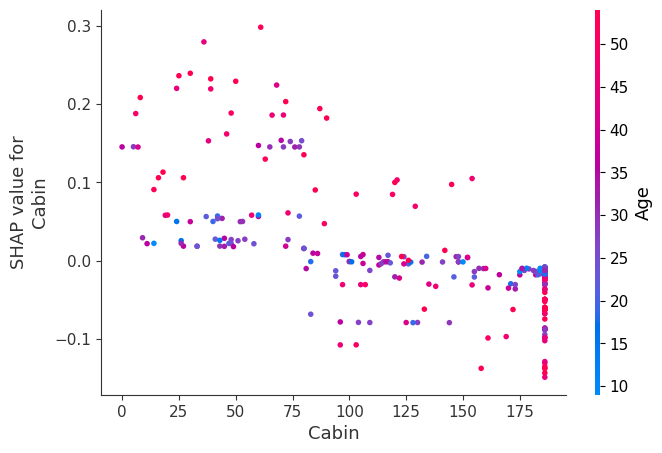

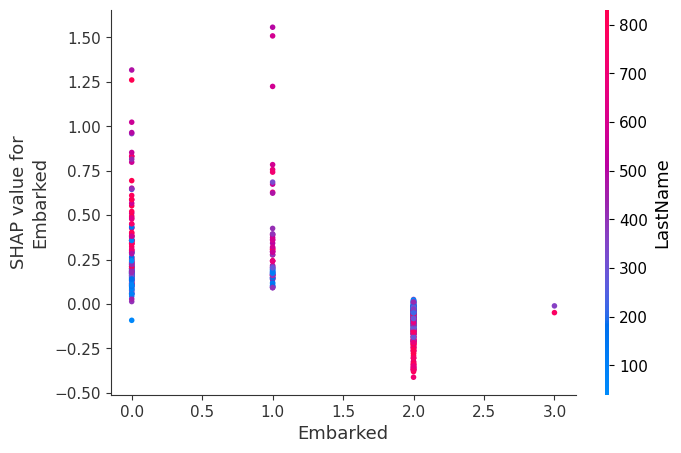

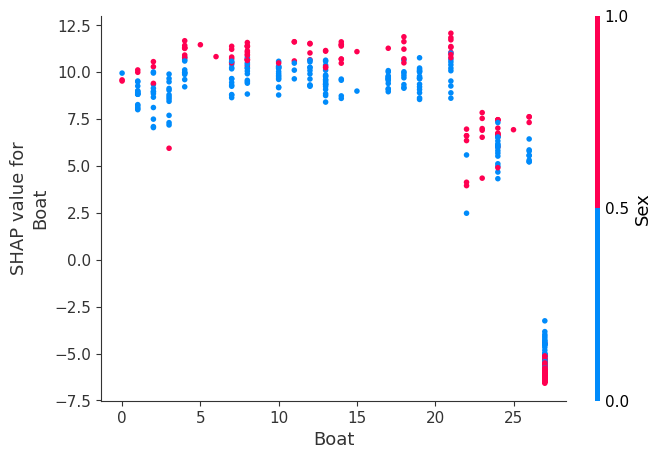

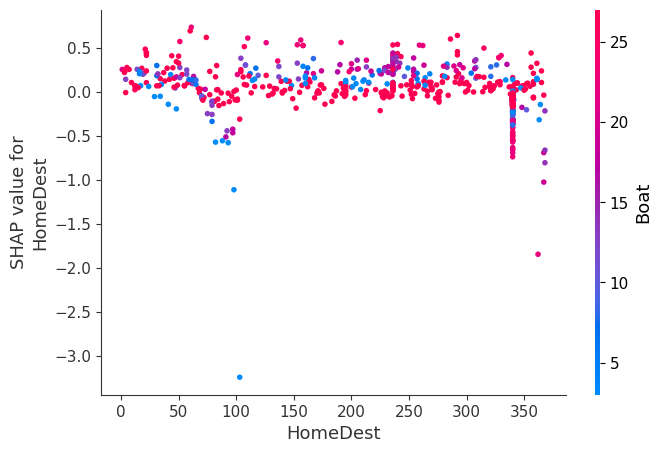

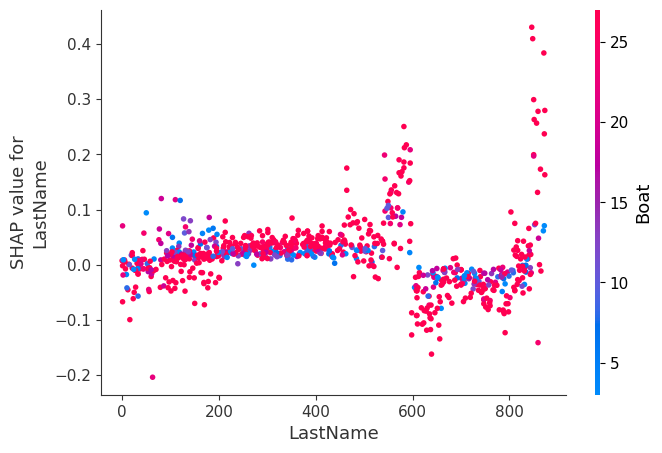

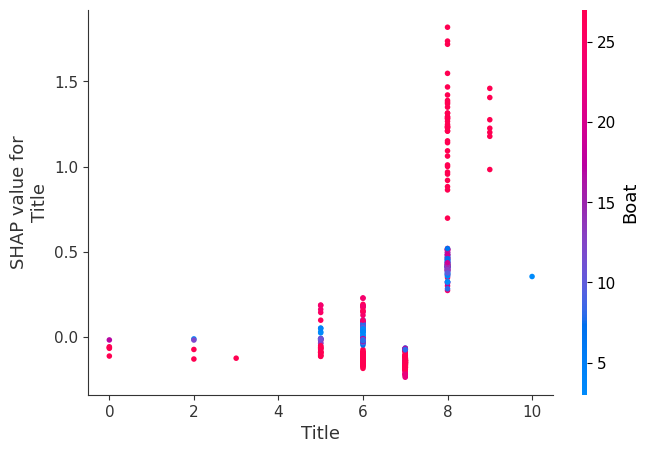

In [48]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)

### Cross-Validation 

In [49]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

#### Model with Default Paremeters

In [50]:
cvmodel = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    n_estimators=100, 
    num_leaves=31, 
    max_depth=-1, 
    learning_rate=0.1, 
    subsample_for_bin=200000, 
    objective='binary', 
    class_weight=None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,  
    importance_type='split', #'gain'
)

In [51]:
y_pred = cross_val_predict(cvmodel, X_train, y_train, cv=5, verbose=False)

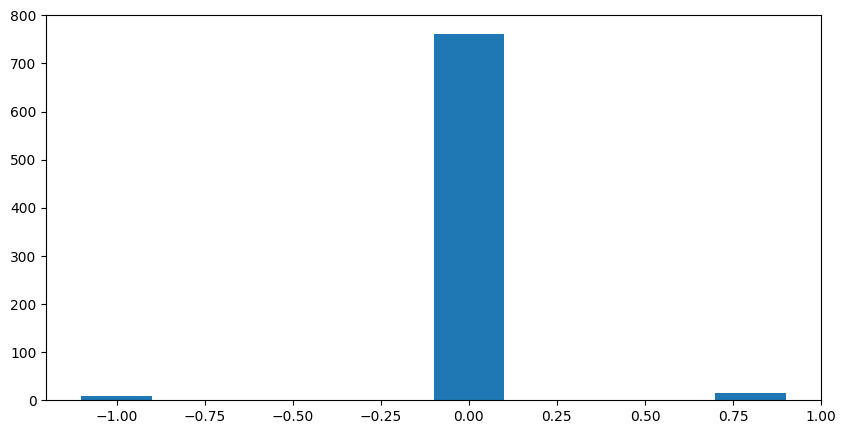

[0.01019108 0.         0.         0.         0.         0.97070064
 0.         0.         0.         0.01910828]


In [52]:
fig, ax = plt.subplots( figsize=(10,5) )

y_delta = y_train.to_numpy() - y_pred
n, bins, patches = ax.hist(y_delta, density=False, histtype='bar', rwidth=2.5, align='left', stacked=False)
plt.show()
print( n/len(y_pred) )

In [53]:
# fig, ax = plt.subplots( figsize=(12,7) )
# ax.scatter(y_train.to_numpy(), y_pred, edgecolors=(0, 0, 0))
# ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
# ax.set_xlabel('Observed')
# ax.set_ylabel('Predicted')
# plt.show()

In [54]:
scores = cross_val_score(cvmodel, X_train, y_train, scoring='accuracy', cv=5)
scores

array([0.96815287, 0.98726115, 0.96815287, 0.96815287, 0.96178344])

In [55]:
scores = cross_validate(cvmodel, X_train, y_train, scoring=['accuracy', 'f1'], cv=5)
scores

{'fit_time': array([0.06841898, 0.05285001, 0.0522759 , 0.05199099, 0.05205369]),
 'score_time': array([0.00303411, 0.00308299, 0.00331616, 0.00308824, 0.00294399]),
 'test_accuracy': array([0.96815287, 0.98726115, 0.96815287, 0.96815287, 0.96178344]),
 'test_f1': array([0.95726496, 0.98360656, 0.96062992, 0.95726496, 0.94915254])}

### Probability Calibration

In [56]:
from sklearn.calibration import CalibratedClassifierCV

In [57]:
calibrated_model = CalibratedClassifierCV(
    estimator=model, 
    method='sigmoid', 
    cv='prefit'
)

In [58]:
calibrated_fit = calibrated_model.fit(X_test, y_test)

In [59]:
calibrated_y_pred  = calibrated_fit.predict(X_test)
calibrated_y_score = calibrated_fit.predict_proba(X_test)

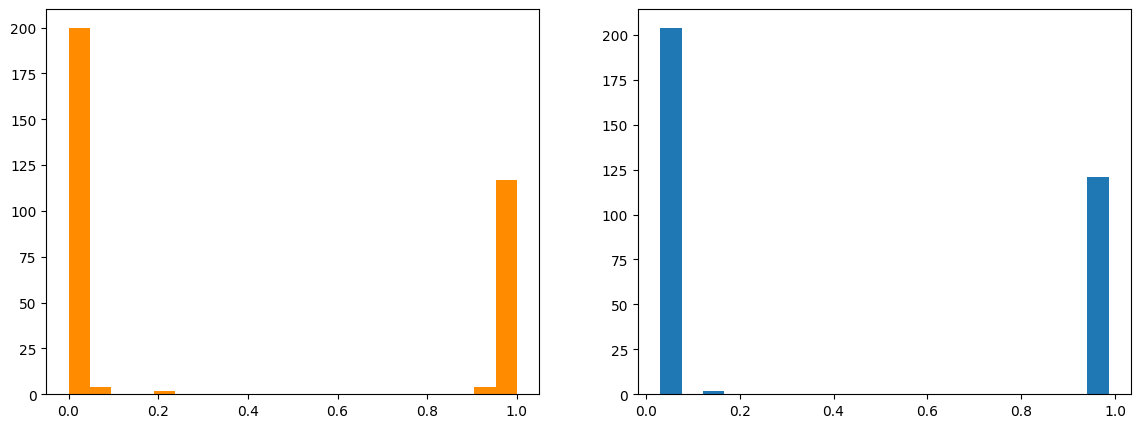

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
ax[0].hist(y_score[:,1], bins=21, color='darkorange')
ax[1].hist(calibrated_y_score[:,1], bins=21)
plt.show()

#### Calibration Curve

In [61]:
from sklearn.calibration import calibration_curve

In [62]:
pdf = pd.DataFrame({'y_test': y_test, 'y_score': y_score[:,1]})
pdf #= pdf.sort_values(by='y_score', ascending=True)
pdf['pbin'] = pd.cut( pdf['y_score'], bins=10, labels=['G'+str(x) for x in range(10)])